In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Read CSV file

In [4]:
df = pd.read_csv('Dataset/Airbnb_Data.csv')
df.rename(columns={'log_price':'price'}, inplace=True)
df['price'] = df['price'].apply(lambda x: np.exp(x))


In [5]:
print(df.shape)
df.head()

(74111, 29)


,id,price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,750.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
newDf = df[df['price'] <= 500]
newDf = newDf[(newDf['cancellation_policy'] == 'strict') | 
              (newDf['cancellation_policy'] == 'moderate') | 
              (newDf['cancellation_policy'] == 'flexible')]
#remove the rows that has review_scores_rating as NaN
newDf = newDf.dropna(subset=['review_scores_rating'])
newDf.head()

,id,price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
4,3808709,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,85.0,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0


In [7]:
#display the number of rows
print(newDf.shape)

(56109, 29)


# Support Vector Regression

In [19]:
# Creating a linear regression model
model_regression = SVR()

<Axes: xlabel='cleaning_fee', ylabel='count'>

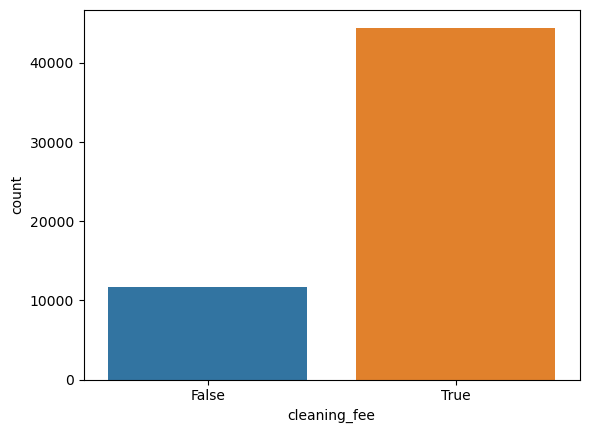

In [6]:
sns.countplot(x='cleaning_fee', data=newDf)


56109


<Axes: xlabel='bathrooms'>

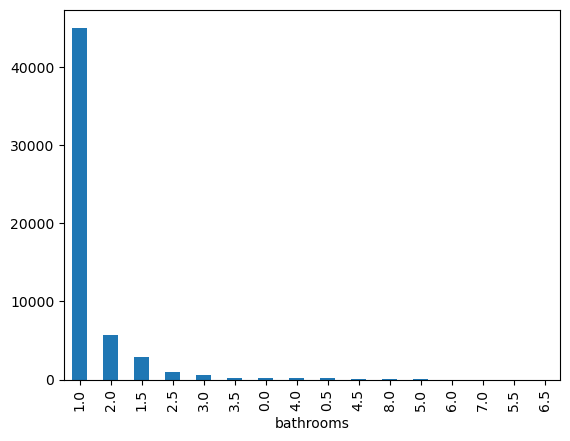

In [27]:
print(len(newDf))
newDf['bathrooms'].value_counts().plot(kind='bar')

# Factorize Columns

In [29]:
#features: [bathrooms, cleaning_fee, bedrooms, city, number_of_reviews, cancellation_policy, review_scores_rating]
#predict: price
#model: Linear Regression
#split data into training and testing 80/20

X = newDf[['beds', 'bedrooms', 'city', 'number_of_reviews', 'cancellation_policy', 'review_scores_rating', 'room_type', 'property_type', 'neighbourhood', 'cleaning_fee', 'instant_bookable',
           'accommodates', 'amenities']]
X['cancellation_policy'] = pd.factorize(X['cancellation_policy'])[0]
X['city'] = pd.factorize(X['city'])[0]
X['room_type'] = pd.factorize(X['room_type'])[0]
X['property_type'] = pd.factorize(X['property_type'])[0]
X['neighbourhood'] = pd.factorize(X['neighbourhood'])[0]
X['instant_bookable'] = pd.factorize(X['instant_bookable'])[0]

X['cleaning_fee'] = X['cleaning_fee'].apply(lambda x: 1 if x == 'True' else 0)



X['amenities'] = X['amenities'].map(lambda x: len(x.split(',')))



X['bedrooms'] = X['bedrooms'].fillna(method='ffill')
X['beds'] = X['beds'].fillna(method='ffill')


y = newDf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# model.fit(X, y)
# print("Linear Regression Model:", model.score(X_test, y_test))

# Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)


model_regression.fit(X_train_poly, y_train)

C:\Users\mosmo\AppData\Local\Temp\ipykernel_12448\2678011602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cancellation_policy'] = pd.factorize(X['cancellation_policy'])[0]
C:\Users\mosmo\AppData\Local\Temp\ipykernel_12448\2678011602.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city'] = pd.factorize(X['city'])[0]
C:\Users\mosmo\AppData\Local\Temp\ipykernel_12448\2678011602.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [22]:
print(X_poly.shape, y_train.shape)

(56109, 560) (44887,)


In [28]:
X_test_poly = poly.fit_transform(X_test)
print("Polynomial Regression Model:", metrics.r2_score(y_test, model_regression.predict(X_test_poly)))

Polynomial Regression Model: -0.039515597690743975


# SVM model

In [5]:
model_svm = SVC(kernel='poly', degree=4, C=2.0)

# param_dist = {
#     'C': np.logspace(-3, 3, 30), 
#     'kernel': ['poly', 'rbf'], 
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto']
# }

# clf_searched = RandomizedSearchCV(model_svm, param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

In [6]:
X = newDf[['bathrooms', 'cleaning_fee', 'bedrooms', 'number_of_reviews', 'cancellation_policy', 'review_scores_rating']]
X['cancellation_policy'] = pd.factorize(X['cancellation_policy'])[0]
X['cleaning_fee'] = X['cleaning_fee'].apply(lambda x: 1 if x == 'True' else 0)
X['bathrooms'] = X['bathrooms'].fillna(X['bathrooms'].mean())
X['bedrooms'] = X['bedrooms'].fillna(X['bedrooms'].mean())


y= newDf['city']
y = pd.factorize(y)[0]

C:\Users\mosmo\AppData\Local\Temp\ipykernel_23080\963636163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cancellation_policy'] = pd.factorize(X['cancellation_policy'])[0]
C:\Users\mosmo\AppData\Local\Temp\ipykernel_23080\963636163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaning_fee'] = X['cleaning_fee'].apply(lambda x: 1 if x == 'True' else 0)
C:\Users\mosmo\AppData\Local\Temp\ipykernel_23080\963636163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
clf_searched.fit(X_train, y_train)
print("SVM Model:", model_svm.score(X_test, y_test))
relevant_columns = ['param_C', 'param_kernel', 'param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']
cv_results_df = pd.DataFrame(clf_searched.cv_results_)[relevant_columns].round(decimals=3).sort_values(by='rank_test_score')
cv_results_df.head(10)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [8]:
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [31]:
y_pred = model_svm.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0 0 0 ... 0 0 0]
Accuracy: 44.79%


# Random Forest model

In [13]:
X = newDf[['beds', 'bedrooms', 'city', 'number_of_reviews', 'cancellation_policy', 'review_scores_rating', 'room_type', 'property_type', 'neighbourhood', 'cleaning_fee', 'instant_bookable',
           'accommodates', 'amenities']]
X['cancellation_policy'] = pd.factorize(X['cancellation_policy'])[0]
X['city'] = pd.factorize(X['city'])[0]
X['room_type'] = pd.factorize(X['room_type'])[0]
X['property_type'] = pd.factorize(X['property_type'])[0]
X['neighbourhood'] = pd.factorize(X['neighbourhood'])[0]
X['instant_bookable'] = pd.factorize(X['instant_bookable'])[0]

X['cleaning_fee'] = X['cleaning_fee'].apply(lambda x: 1 if x == 'True' else 0)



X['amenities'] = X['amenities'].map(lambda x: len(x.split(',')))



X['bedrooms'] = X['bedrooms'].fillna(method='ffill')
X['beds'] = X['beds'].fillna(method='ffill')


y = newDf['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

C:\Users\mosmo\AppData\Local\Temp\ipykernel_20556\3390675641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cancellation_policy'] = pd.factorize(X['cancellation_policy'])[0]
C:\Users\mosmo\AppData\Local\Temp\ipykernel_20556\3390675641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['city'] = pd.factorize(X['city'])[0]
C:\Users\mosmo\AppData\Local\Temp\ipykernel_20556\3390675641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [14]:
newDf

,id,price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
4,3808709,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
5,12422935,85.0,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,14934112,78.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,...,41.909067,-87.623046,Gold Coast Specialty,NaN,6,100.0,https://a0.muscache.com/im/pictures/32922903/b...,60610,1.0,1.0
74105,808802,70.0,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,34.092640,-118.343921,Private Bed/Bathroom in Cute House!,NaN,36,91.0,https://a0.muscache.com/im/pictures/ae2e48de-6...,90038,1.0,1.0
74107,13281809,155.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,185.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0


Checking if the data contains any missing values.

In [15]:
X_train.isna().sum()

beds                    0
bedrooms                0
city                    0
number_of_reviews       0
cancellation_policy     0
review_scores_rating    0
room_type               0
property_type           0
neighbourhood           0
cleaning_fee            0
instant_bookable        0
accommodates            0
amenities               0
dtype: int64

In [17]:
randomForest = RandomForestRegressor()

randomForest.fit(X_train, y_train)

y_pred = randomForest.predict(X_test)

In [18]:
r2 = metrics.r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.5896573095722537
